# Unit 3 Capstone - Supervised Learning - Analysis of Reviews and Ratings in Google App Store


![google play store](http://idaay.org/wp-content/uploads/2018/07/kisspng-google-play-android-app-store-google-play-5ac7a0bf108fc6.0418072915230322550678.jpg)

## Topic

The data for the capstone has been taken from [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps).

The scope of this supervised machine learning capstone is to explore features related to the sucess of apps within the Google Play Store Apps.  We aim to see the relationship these features have against ratings for these apps. We will split our modeling between accurately being able to classify our data and predicting the features of the apps against their ratings.

We have to deal with a lot of dirty data and need to binarize the parameters properly. 

[Github Repository](https://raw.githubusercontent.com/nairjr/Datasets/master/googleplaystore.csv) 



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
google = pd.read_csv('https://raw.githubusercontent.com/andandandand/CSV-datasets/master/googleplaystore.csv')
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We notice that most of the variables in this dataset are objects. Let's change these to floats for our machine learning purposes.
We can eliminate the variables that are not important to this report.

In [4]:
google.drop(['App','Genres',
             'Last Updated',
             'Current Ver','Android Ver'], 
              axis=1, inplace=True)

Change column names for simplicity.

In [5]:
google = google.rename(index= str, columns={"Content Rating":"content_rating"})

### Ratings

In [6]:
google.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [7]:
import statistics

statistics.median(google['Rating'])

statistics.mode(google['Rating'])



4.4

In [8]:
google.Rating.dropna(inplace = True)

### Reviews

In [9]:
google.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [10]:
google.replace('3.0M', 3000000, inplace=True)

In [11]:
google['Reviews'] = google['Reviews'].str.strip("-")

In [12]:
google.Reviews = pd.to_numeric(google['Reviews'], errors='coerce')

In [13]:
import statistics
statistics.median(google['Reviews'])

382.0

In [14]:
google.Reviews.count

<bound method Series.count of 0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
5           167.0
6           178.0
7         36815.0
8         13791.0
9           121.0
10        13880.0
11         8788.0
12        44829.0
13         4326.0
14         1518.0
15           55.0
16         3632.0
17           27.0
18       194216.0
19       224399.0
20          450.0
21          654.0
22         7699.0
23           61.0
24          118.0
25          192.0
26        20260.0
27          203.0
28          136.0
29          223.0
           ...   
10811         4.0
10812        80.0
10813        20.0
10814       785.0
10815      5775.0
10816         2.0
10817       885.0
10818        96.0
10819        52.0
10820        22.0
10821         6.0
10822         0.0
10823         1.0
10824        67.0
10825         7.0
10826     88486.0
10827       117.0
10828       291.0
10829       603.0
10830       881.0
10831        38.0
10832      1195.0
10833        44.

### Price

We need to get rid of the dollar sign and dirty data to convert the string to a float.

In [15]:
google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [16]:
google.Price = google.Price.str.strip('$ ')
google.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [17]:
google.Price = pd.to_numeric(google['Price'], errors='coerce')

In [18]:
google.Price.dropna(inplace = True)

### Category

We will be using the categories aas a parameter to compare the correlation between other variables. Let's use the labelEncoder package from sklearn to convert these to numeric classifications.

In [19]:
google.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [20]:
#Fix misplaced value
google = google.replace(to_replace = '1.9', value = 'ART_AND_DESIGN')
#inplace?
google = google.replace(19, 1.9)

In [21]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
google['category_code'] = LE.fit_transform(google['Category'])


In [22]:
google['category_code'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19],
      dtype=int64)

In [23]:
google.drop(['Category'], axis=1, inplace= True)

### Installs

In [24]:
google.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [25]:
google.Installs = google.Installs.str.strip('+')
google.Installs = google.Installs.str.replace(',','')
google.Installs = pd.to_numeric(google['Installs'], errors='coerce')

In [26]:
google.Installs.dropna(inplace=True)

In [27]:
google.describe()

,Rating,Reviews,Installs,Price,category_code
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000,10841.000000
mean,4.191513,4.441528e+05,1.546434e+07,1.027368,16.723826
std,0.515735,2.927761e+06,8.502936e+07,15.949703,8.354469
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000,11.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,14.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,25.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,32.000000


### Content Ratings

In [28]:
google.content_rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [29]:
# Changing variables to integers
content_rating_code = {"content_rating": {"Everyone":0, "Teen":1, "Everyone 10+":2, "Mature 17+":3, "Adults only 18+":4, "Unrated":5, "nan":"" }}

In [30]:
google.replace(content_rating_code, inplace= True)

In [31]:
google.tail()

,Rating,Reviews,Size,Installs,Type,Price,content_rating,category_code
10836,4.5,38.0,53M,5000.0,Free,0.0,0.0,11
10837,5.0,4.0,3.6M,100.0,Free,0.0,0.0,11
10838,NaN,3.0,9.5M,1000.0,Free,0.0,0.0,20
10839,4.5,114.0,Varies with device,1000.0,Free,0.0,3.0,3
10840,4.5,398307.0,19M,10000000.0,Free,0.0,0.0,18


In [32]:
google.describe()

,Rating,Reviews,Installs,Price,content_rating,category_code
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000,10840.000000,10841.000000
mean,4.191513,4.441528e+05,1.546434e+07,1.027368,0.327952,16.723826
std,0.515735,2.927761e+06,8.502936e+07,15.949703,0.761608,8.354469
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000,0.000000,11.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,0.000000,14.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,0.000000,25.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,5.000000,32.000000


### Size

In [33]:
google.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# this cell should only be run once

```
mega = google['Size'].str.contains('M')
kilo = google['Size'].str.contains('k')
```

```
google['Size'] = google['Size'].str.strip('k')
google['Size'] = google['Size'].str.strip('M')
google['Size'] = pd.to_numeric(google['Size'], errors='coerce')
```



```
google['Size'].loc[mega] = google['Size'].loc[mega] * 1000000
google['Size'].loc[kilo] = google['Size'].loc[kilo] * 1000
```


### Type

In [34]:
google.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [35]:
google.dropna(inplace=True)

In [36]:
google.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [37]:
# Changing variables to integers
type_code = {"Type": {"Free": 0, "Paid":1}}

In [38]:
google.replace(type_code, inplace=True)

## Visualizations

We will be utilisizing matplotlib and seaborn packages to conduct an exploratory data analysis on our dataframe.

In [39]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [40]:
google.drop("Size",axis=1, inplace=True)

In order to avoid skewed results, we should scale our variables.
Check if y needs to be scaled.

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(google))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [42]:
google_scaled = pd.DataFrame(scaler.fit_transform(google), columns=google.columns)

### Pairplot

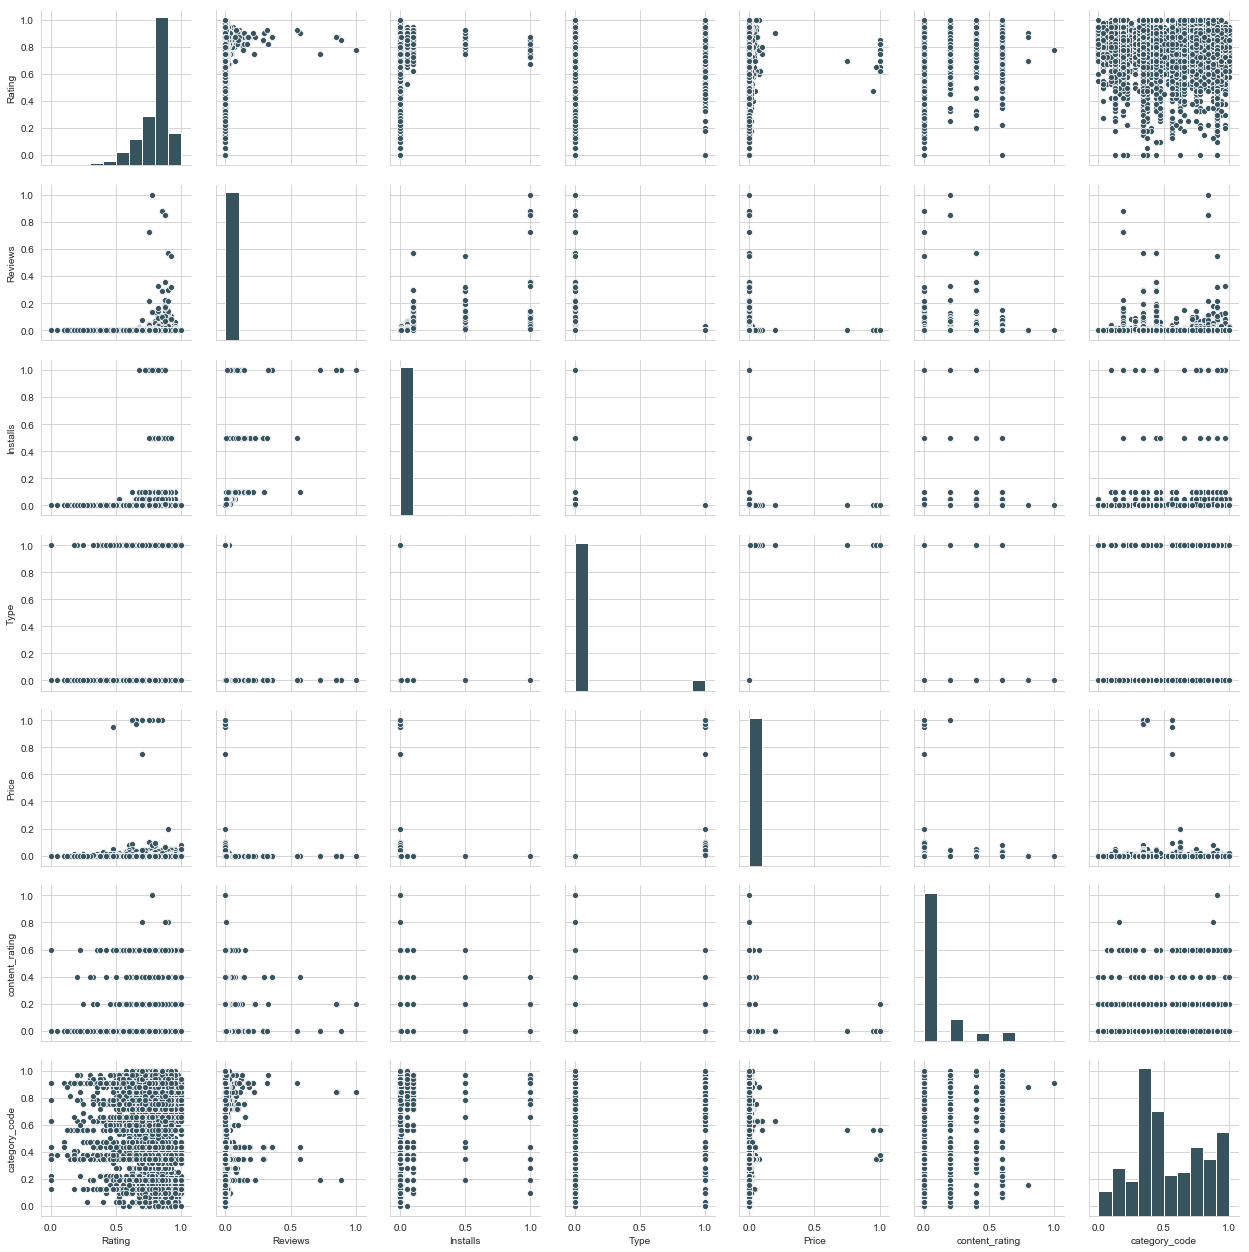

In [43]:
sns.pairplot(google_scaled)

We can see that from the above pairplot that we do not have any linear relationships amongst the variables. 

### Distribution Plots

C:\Users\nairj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


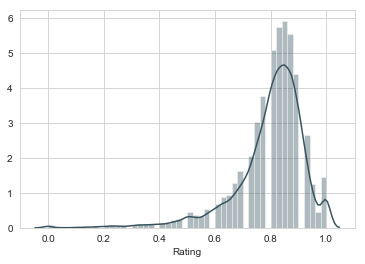

In [44]:
sns.distplot(google_scaled["Rating"])

### Heatmap

In [45]:
google_scaled.corr()

,Rating,Reviews,Installs,Type,Price,content_rating,category_code
Rating,1.000000,0.068141,0.051355,0.039581,-0.021903,0.000931,-0.034603
Reviews,0.068141,1.000000,0.641612,-0.043290,-0.009820,0.060971,0.000883
Installs,0.051355,0.641612,1.000000,-0.053102,-0.011890,0.028532,0.022763
Type,0.039581,-0.043290,-0.053102,1.000000,0.223040,-0.034638,0.023227
Price,-0.021903,-0.009820,-0.011890,0.223040,1.000000,-0.016128,-0.012913
content_rating,0.000931,0.060971,0.028532,-0.034638,-0.016128,1.000000,-0.124740
category_code,-0.034603,0.000883,0.022763,0.023227,-0.012913,-0.124740,1.000000



We observe a high correlation ($r = 0.64$) between the numbers of reviews and installs. Intuitively this makes sense, as apps that have been installed more often would have a higher number of reviews. These is also a modest correlation ($r=0.22$) between type and price of an app.  



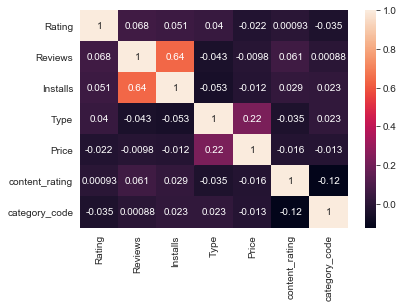

In [46]:
sns.heatmap(google_scaled.corr(),annot=True)

We see that installs and reviews have the highest correlation. Negative correlations such as price vs. most variables could indicate that high prices are a putoff for users.

### Scatterplot

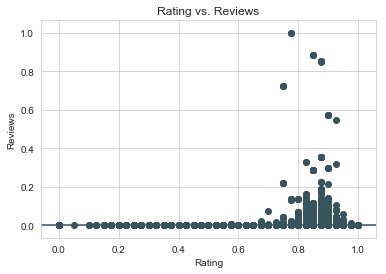

In [47]:
plt.scatter(google_scaled.Rating, google_scaled.Reviews)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.axhline(y=0)
plt.title('Rating vs. Reviews')
plt.show()


The scatterplot shows higher ratings with higher reviews, which makes sense. Apps with good ratings might have users leaving a good reviews for others to view.





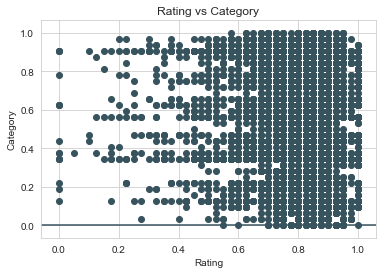

In [48]:
plt.scatter(google_scaled.Rating, google_scaled.category_code)
plt.xlabel('Rating')
plt.ylabel('Category')
plt.axhline(y=0)
plt.title('Rating vs Category')
plt.show()


## Data Modeling

**Splitting the data modeling in two parts: Classification and Regression. The classification models should help us correctly classify the categorical variables against ratings.**


## Regression Analyses

Lets begin by training our regression model. We aim at predicting the features that would lead to a given rating. 

In [49]:
#Assigning my x and y

features = ['Reviews','Installs','Type','Price',
            'category_code','content_rating']
X = google_scaled[features]
y = google_scaled[['Rating']]

In [50]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=101)

### Ridge Regression
With ridge regression, we try to predict the rating as a continuous value. The low $r^2$ value indicates that these features have low explanatory power. We're likely underfitting the dataset. 

**TO DO: add polynomial features and use a lower value for alpha **

In [52]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

ridgeregr = linear_model.Ridge(alpha=0.5, fit_intercept=True) 
ridgeregr.fit(X_train, y_train)
print("The r^2 value is = {}".format(ridgeregr.score(X_train, y_train)))
origparams = ridgeregr.coef_[0]
print("The parameters of features {} \n for the ridge regression model are \n{}".format(features, origparams))




The r^2 value is = 0.008564418905254056
The parameters of features ['Reviews', 'Installs', 'Type', 'Price', 'category_code', 'content_rating'] 
 for the ridge regression model are 
[ 0.1618027   0.02650054  0.02595659 -0.08714568 -0.01947737  0.00234455]


In [53]:
#Polynomial Ridge Regression
from sklearn.preprocessing import PolynomialFeatures

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')


X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, 
                                                              y,
                                                              random_state = 0)




ridgereg = Ridge().fit(X_train_poly, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(ridgereg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {}'.format(ridgereg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {}'.format(ridgereg.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'.format(ridgereg.score(X_test_poly, y_test)))



Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[[ 0.00000000e+00  2.78950506e-01  2.16420903e-01  6.63800203e-03
  -3.40277212e-02  5.28231530e-02 -1.86844155e-02 -1.56101414e-01
  -1.54042240e-01  3.61885309e-03  4.40025691e-05  1.12582907e-01
   2.39671586e-02 -2.62963228e-01  2.17005644e-03  1.88825852e-05
   5.51066201e-02 -2.02420052e-02  6.63800203e-03 -3.40277212e-02
   1.85762907e-02  6.29007300e-02 -1.33086994e-03 -5.11846340e-02
   1.17069304e-02 -7.25191588e-02  1.25360705e-01 -1.13356854e-01]]
(poly deg 2 + ridge) linear model intercept (b): [0.79159375]
(poly deg 2 + ridge) R-squared score (training): 0.02244357263766383
(poly deg 2 + ridge) R-squared score (test): 0.024319713337627835


### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lm = LinearRegression()

In [56]:
#Train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
#Evaluate by checking coefficients and intercept
print(lm.intercept_)

[0.80417688]


In [58]:
print ("Features: {}".format(features))
# The coefficients are relatively low 
print('Coefficients: \n', lm.coef_)



Features: ['Reviews', 'Installs', 'Type', 'Price', 'category_code', 'content_rating']
Coefficients: 
 [[ 0.17311278  0.02341905  0.02615527 -0.09135575 -0.01950176  0.00222041]]


In [59]:
#Test
predictions = lm.predict(X_test)

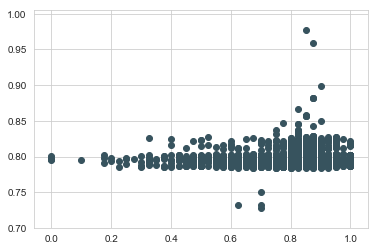

In [60]:
plt.scatter(y_test,predictions)
#Why does it not show a straight line? 
#Is corr low?

In [61]:
#Evaluate
#Mean Squared Error = MSE
#Mean Absolute Error = MAE
#Root Mean Squared = RSME
#from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.08931495536371267
MSE: 0.016007898366191792
RMSE: 0.12652232358833673


C:\Users\nairj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


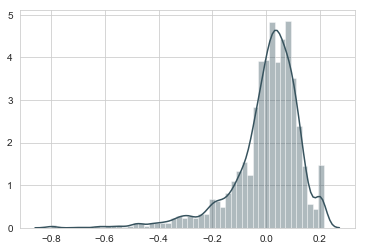

In [62]:
#Residuals
sns.distplot((y_test-predictions),bins=50);

In [63]:
#Polynomial Linear Regression
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')


X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, 
                                                              y,
                                                              random_state = 0)


linreg = LinearRegression().fit(X_train_poly, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {}'
     .format(linreg.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}'
     .format(linreg.score(X_test_poly, y_test)))


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2) linear model coeff (w):
[[-2.99929554e-10  6.25553178e-01  1.67036670e-01  2.59864401e-03
   1.25359599e-01  5.28265136e-02 -1.96160289e-02 -5.77619384e-01
  -1.91590625e-01  1.15677932e+02 -6.97730971e+03  1.52056961e-01
  -1.31894196e-01 -2.34068348e-01 -5.35502263e+01  4.33039973e+03
   4.99606814e-02 -6.50233243e-02  2.59852056e-03  1.25359692e-01
   3.02228585e-02  5.66468808e-02 -6.51806378e-02 -7.17823386e-01
   3.41221307e-01 -7.29336406e-02  1.38232585e-01 -1.24788282e-01]]
(poly deg 2) linear model intercept (b): [0.79089785]
(poly deg 2) R-squared score (training): 0.024710738145733546
(poly deg 2) R-squared score (test): 0.026477949791045452


## Classifier Analyses

### Logistic Regression 

In [64]:
# Logistic regression is a classification model 
from sklearn.linear_model import LogisticRegression

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=101)

In [66]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

C:\Users\nairj\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print('median rating = {}, min rating = {}, max rating = {}'.format(y_train.median()
, y_train.min(), y.max()))

median rating = Rating    0.825
dtype: float64, min rating = Rating    0.0
dtype: float64, max rating = Rating    1.0
dtype: float64


To apply logistic regression, we binarize ratings as being above or below the median. 

In [68]:
y_train_binary = (y_train > y_train.median()).astype(np.int)
y_train_binary.head(3)

,Rating
558,1
1891,1
5626,0


In [69]:
print(utils.multiclass.type_of_target(y_train_binary))

binary


In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train_binary)


C:\Users\nairj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predictions = logmodel.predict(X_train)
print(predictions.shape, y_train_binary.shape)


(6556,) (6556, 1)


In [72]:
#Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_train_binary,predictions))

             precision    recall  f1-score   support

          0       0.58      0.94      0.72      3707
          1       0.60      0.11      0.19      2849

avg / total       0.59      0.58      0.49      6556



In [73]:
#Encode ytest
lab_enc = preprocessing.LabelEncoder()
encoded_test = lab_enc.fit_transform(y_test)

C:\Users\nairj\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
y_test_binary = (y_test > y_test.median()).astype(np.int)
y_test_binary.head(3)

,Rating
7693,1
3053,1
3387,0


In [75]:
print(utils.multiclass.type_of_target(y_test_binary))

binary


In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_test,y_test_binary)

C:\Users\nairj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
predictions_test = logmodel.predict(X_test)
print(predictions_test.shape, y_test_binary.shape)


(2810,) (2810, 1)


In [78]:
print(classification_report(y_test_binary,predictions_test))

             precision    recall  f1-score   support

          0       0.58      0.94      0.72      1595
          1       0.57      0.10      0.16      1215

avg / total       0.58      0.58      0.48      2810



Test is close to train (a little lower).

### Decision Trees

In [79]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train_binary)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X_train.columns,
    class_names=['High Rating','Low Rating'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [ ]:
predictions_test = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test_binary,predictions_test))

Awesome, its performing marginally better!

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train_binary)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test_binary,rfc_pred))

In [ ]:
print(classification_report(y_test_binary, rfc_pred))

The random forest classifier outperforms the other two. We care the most about the f1-score metric which represents the **harmonic mean** of precision and recall. Both precision and recall have to be high for the $f_1$ measure to be high. 

$$\textit{precision} = \frac{TP}{TP + FP}$$


$$\textit{recall} = \frac{TP}{TP + FN}$$


$$f_{1} = \frac{2 \times \textit{precision} \times{recall}}{\textit{precision} + {recall}}$$